# About the Dataset

The dataset selected for this project is a set of synthetic (simulated with Faker python library) online transactions from an e-commerce. **The objective of the project is to build a model to predict potential fraud transactions**. Fraud detection is an important aspect of banking and financial companies. It’s essential for both financial institutions as well as their customers to be able to identify fraud quickly and accurately. For this purpose, after preprocessing the data and doing some Exploratory Data Analysis (EDA), we will use classification machine learning models (ML) to try to predict fraudulent transactions accurately.

The dataset is under MIT license and can be found on Kaggle [here](https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/data). Credit to Shriyash Jagtap for providing the dataset.

### **Note: The notebooks of this project can be reused as a template for future data preprocessing just changing the dataset's paths and columns accordingly.**

### The dataset contains the following columns:  

**1.Transaction ID:** A unique identifier for each transaction.  
**2.Customer ID:** A unique identifier for each customer.  
**3.Transaction Amount:** The total amount of money exchanged in the transaction.  
**4.Transaction Date:** The date and time when the transaction took place.  
**5.Payment Method:** The method used for payment (e.g., credit card, PayPal, etc.).  
**6.Product Category:** The category of the purchased product.  
**7.Quantity:** The quantity of purchased products.  
**8.Customer Age:** The age of the customer at the time of the transaction.  
**9.Customer Location:** The geographical location of the customer.  
**10.Device Used:** The type of device used to make the transaction (e.g., smartphone, desktop).  
**11.IP Address:** The IP address from which the transaction was made.  
**12.Shipping Address:** The physical address to where the product was shipped.  
**13.Billing Address:** The billing address associated with the payment method.  
**14.Is Fraudulent:** A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).  
**15.Account Age Days:** The age of the creation of the account.  
**16.Transaction Hour:** The hour of the day when the transaction occurred.  

# About this Notebook

In this notebook, we will preprocess the data (*transactions.csv*) to be used in the model.  The steps that we will follow are:

**1. Import libraries**  
**2. Upload data**  
**3. Data Cleaning & Preprocessing**  
    - Check dataframe info  
    - Check for missing values  
    - Check for duplicates  
    - Check descriptive statistics  
    - Check for outliers  
    - Create and transform features   
**4. Save data**  

## 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Upload data

In [2]:
# upload the data from the local file. Write the path to the file
path = "../data/transactions.csv"
df = pd.read_csv(path, encoding='latin1')

## 3. Data Cleaning & Preprocessing

In [3]:
# read the first rows of the dataframe to understand the data structure
print('First rows of the dataframe:')
df.head()

First rows of the dataframe:


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [4]:
# check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

Missing values:
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


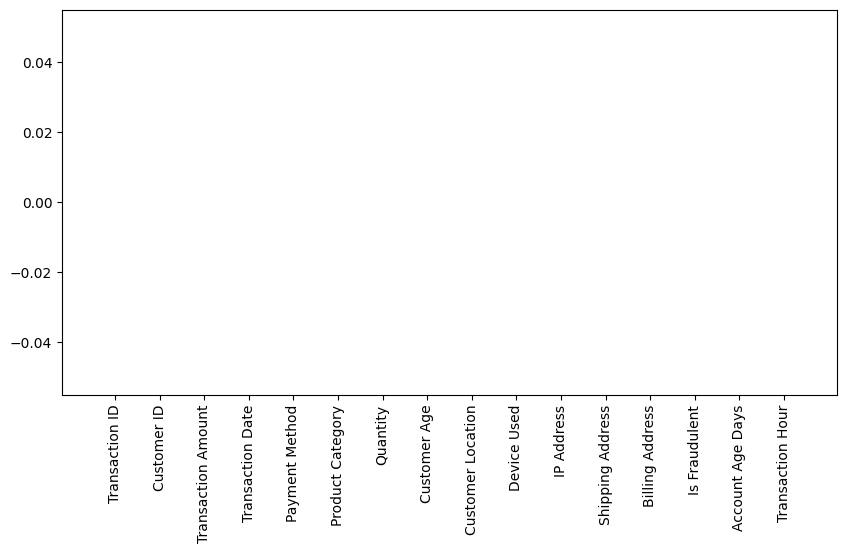


Missing values filled:
float64: 0
int64: 0
object: 0


In [5]:
# check for missing values
print('Missing values:')
print(df.isnull().sum())

# we can also use a graph to visualize the missing values
plt.figure(figsize=(10, 5))
plt.bar(df.columns, df.isnull().sum())
plt.xticks(rotation=90)
plt.show()


"""In this particular case we just saw that there is no missing values in the dataframe 
but we still leave the code here for fixing them, for future reference"""

# fill the missing values taking into account the data type of the columns
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# count the number of missing values filled
filled_float64 = df.select_dtypes(include=['float64']).isnull().sum().sum()
filled_int64 = df.select_dtypes(include=['int64']).isnull().sum().sum()
filled_object = df.select_dtypes(include=['object']).isnull().sum().sum()

print('\nMissing values filled:')
print(f'float64: {filled_float64}')
print(f'int64: {filled_int64}')
print(f'object: {filled_object}')

In [6]:
# check for duplicates
duplicates = df.duplicated().sum()
print('Number of duplicates', duplicates)

# remove duplicates
df.drop_duplicates(inplace=True)
print('Duplicates removed:', duplicates)

Number of duplicates 0
Duplicates removed: 0


Distribution of the numerical columns:
       Transaction Amount   Quantity  Customer Age  Is Fraudulent  \
count          1472952.00 1472952.00    1472952.00     1472952.00   
mean               226.77       3.00         34.51           0.05   
std                270.40       1.41         10.00           0.22   
min                 10.00       1.00        -16.00           0.00   
25%                 68.61       2.00         28.00           0.00   
50%                151.76       3.00         35.00           0.00   
75%                296.05       4.00         41.00           0.00   
max              12701.75       5.00         86.00           1.00   

       Account Age Days  Transaction Hour  
count        1472952.00        1472952.00  
mean             179.65             11.29  
std              106.86              6.98  
min                1.00              0.00  
25%               86.00              5.00  
50%              179.00             11.00  
75%              272.00        

array([[<Axes: title={'center': 'Transaction Amount'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Customer Age'}>,
        <Axes: title={'center': 'Is Fraudulent'}>],
       [<Axes: title={'center': 'Account Age Days'}>,
        <Axes: title={'center': 'Transaction Hour'}>]], dtype=object)

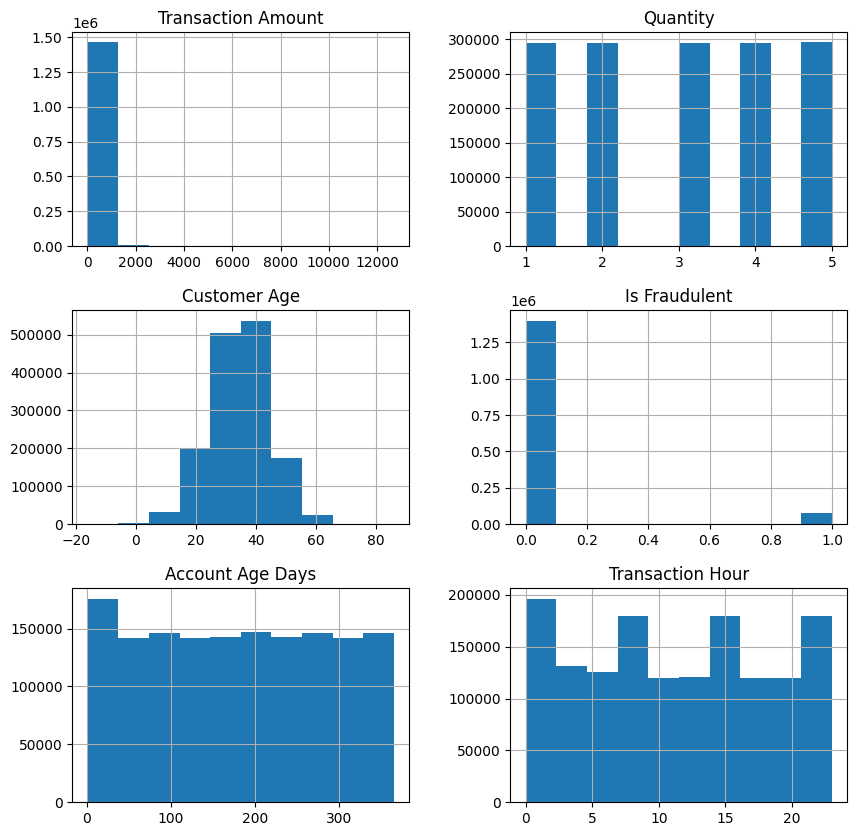

In [7]:
# check descriptive statistics of the numerical columns
pd.options.display.float_format = '{:.2f}'.format

print('Distribution of the numerical columns:')
print(df.describe())
df.hist(figsize=(10, 10))

In [8]:
# check for outliers in 'Transaction Amount' and 'Customer Age' columns usign the IQR method
outliers_column = df[['Transaction Amount', 'Customer Age']]
for column in outliers_column:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    print(f'Outliers in {column}: {outliers.sum()}')

# in this particular case we will not remove the outliers in 'Transactions Amount' column because they could be important for the analysis giving the nature of the objective (fraud detection). 
# in fact, there are negative values in the Age column, which is not possible in real life, but we will keep them for the EDA analysis.

Outliers in Transaction Amount: 79180
Outliers in Customer Age: 13746


In [9]:
# create a new column where we check if billing adress coincides with the shipping address and set it to 1 if it is the same and 0 if it is not
# we will use this column to check if there is a pattern in the fraud transactions
df['Shipping Billing Same'] = (df['Billing Address'] == df['Shipping Address']).astype('int64')

In [10]:
# transform the date columns to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [11]:
# we drop the columns that are not useful for the analysis
df.drop(['Transaction ID', 'Customer ID', 'Transaction Date', 'Customer Location', 'IP Address', 'Billing Address', 'Shipping Address'], axis=1, inplace=True)

## 4. Save the data

In [12]:
# save the preprocessed data into a new csv file for further analysis in the next steps
df.to_csv('../data/transactions_processed.csv', index=False)